## Reporte Amplificador

En este documento se detallan los estudios realizados para caracterizar un amplificador. Las mediciones se tomaron con un dispositivo LIA SR380 DSP.  

#### Diagrama del amplificador
<div>
<img src="figs/ampli_diagram.png" width="500" />
<img src="figs/pin_config.png" width="200"/>
</div>


$$ R_L = 44,7 k\Omega \Rightarrow G = \frac{49.9k\Omega}{R_L} + 1 \sim 2,12 $$

In [1]:
#descargo los modulos y librerias que se utilizan 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os


In [2]:
#defino una funcion que contenga los detalles esteticos que quiero

def subplot_figure(ax,title,xlabel, ylabel, scale):
    ax.grid()
    ax.set_title(title,fontsize = 15)
    ax.set_xlabel(xlabel,fontsize = 15)
    ax.set_ylabel(ylabel,fontsize = 15)
    ax.set_xscale(scale)
    ax.tick_params(axis='both', labelsize=14)
    
def plot_figure(title,xlabel, ylabel, scale):
    fig = plt.figure(figsize=(7,5))
    plt.title(title,fontsize=20)
    plt.grid()
    plt.xlabel(xlabel,fontsize=15)
    plt.ylabel(ylabel,fontsize=15)
    plt.xscale(scale)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    return fig

## Primer Armonico
### Medición A
Para estudiar cada armónico, se realizan mediciones previas con el fin de analizar el ruido proveniente del dispositivo mismo. El montaje fue el siguiente
<div>
<img src="figs/diagrama_ampli2.png" width="500"/>
</div>


### Medición B
Una vez estudiado el ruido de fondo del dispositivo de medición, se procede a medir la respuesta del amplificador ante distintos estímulos. En este caso se quiere estudiar la respuesta del aparato en función de la frecuencia con la que se lo alimenta. Para ello se montó el siguiente circuito:
<div>
<img src="figs/diagrama_ampli.png" width="500"/>
</div>

Se utiliza el LIA como generador de señales, alimentando tanto el dispositivo bajo prueba (el amplificador) como la entrada de referencia, mientras que la pequeña señal inundada de ruido (que sale del dispositivo bajo prueba) se alimenta a la entrada de medición del amplificador lock-in. La salida está conectada a una computadora, en donde se obtiene la fase y la amplitud de la pequeña señal.

### Medición A

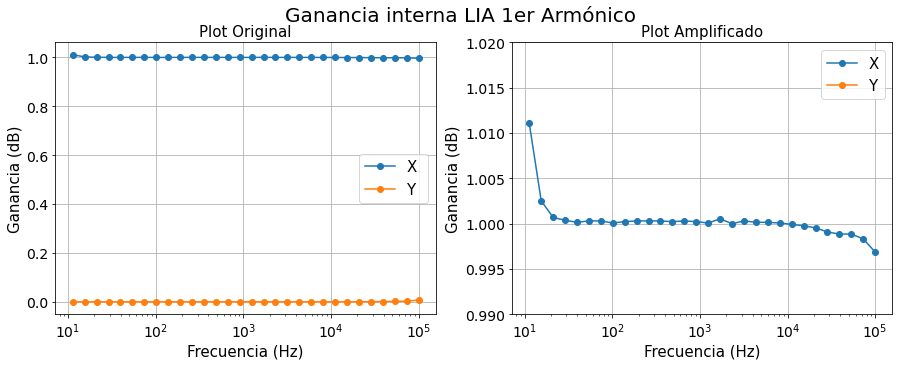

In [3]:


# abro el archivo
df = pd.read_csv(f"data/harm#1/20230626132240_int.txt", sep="\t")
V_in = 0.05


#abro las figuras
f, (a0, a1) = plt.subplots(1, 2, figsize=(15,5))
f.suptitle(f'Ganancia interna LIA 1er Armónico',fontsize = 20)


#ploteo
subplot_figure(a0,'Plot Original','Frecuencia (Hz)','Ganancia (dB)','log')
a0.plot(df['# frequency (Hz)'],df['Voltage_X (V) ']/V_in,'-o', label='X ')
a0.plot(df['# frequency (Hz)'],np.abs(df['Voltage_Y (V)']/V_in),'-o', label='Y')
a0.legend(fontsize=15)

#zoom
subplot_figure(a1,'Plot Amplificado','Frecuencia (Hz)','Ganancia (dB)','log')
a1.plot(df['# frequency (Hz)'],df['Voltage_X (V) ']/V_in,'-o', label='X')
a1.plot(df['# frequency (Hz)'],np.abs(df['Voltage_Y (V)'])/V_in,'-o', label='Y')
a1.set_ylim(0.99,1.02)
a1.legend(fontsize=15)


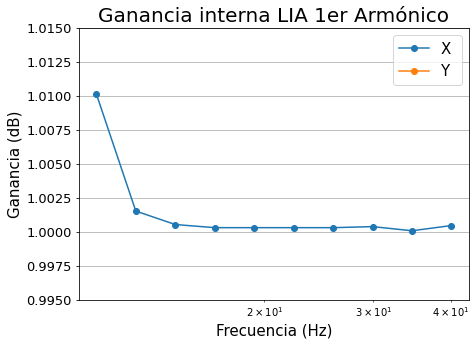

In [4]:
#ploteo un barrido entre 10Hz y 40Hz
# abro el archivo
df = pd.read_csv(f"data/harm#1/20230626132624_int.txt", sep="\t")
V_in = 0.05


#ploteo
plot_figure('Ganancia interna LIA 1er Armónico','Frecuencia (Hz)','Ganancia (dB)','log')
plt.plot(df['# frequency (Hz)'],df['Voltage_X (V) ']/V_in,'-o', label='X ')
plt.plot(df['# frequency (Hz)'],np.abs(df['Voltage_Y (V)']/V_in),'-o', label='Y')
plt.ylim(0.995,1.015)
plt.legend(fontsize=15)


### Medición B

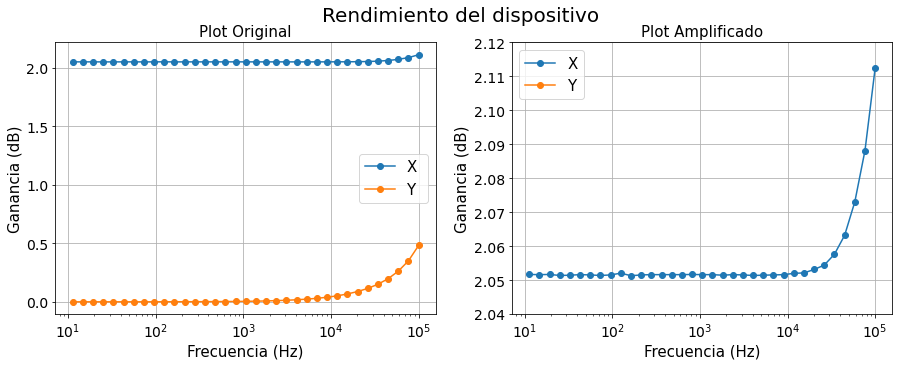

In [5]:
# abro el archivo
df = pd.read_csv(f"data/harm#1/20230626130737.txt", sep="\t")
V_in = 0.05


#abro las figuras
f, (a0, a1) = plt.subplots(1, 2, figsize=(15,5))
f.suptitle(f'Rendimiento del dispositivo',fontsize = 20)


#ploteo
subplot_figure(a0,'Plot Original','Frecuencia (Hz)','Ganancia (dB)','log')
a0.plot(df['# frequency (Hz)'],df['Voltage_X (V) ']/V_in,'-o', label='X ')
a0.plot(df['# frequency (Hz)'],np.abs(df['Voltage_Y (V)']/V_in),'-o', label='Y')
a0.legend(fontsize=15)

#zoom
subplot_figure(a1,'Plot Amplificado','Frecuencia (Hz)','Ganancia (dB)','log')
a1.plot(df['# frequency (Hz)'],df['Voltage_X (V) ']/V_in,'-o', label='X')
a1.plot(df['# frequency (Hz)'],np.abs(df['Voltage_Y (V)'])/V_in,'-o', label='Y')
a1.set_ylim(2.04,2.12)
a1.legend(fontsize=15)



## Segundo Armonico
### Medición A

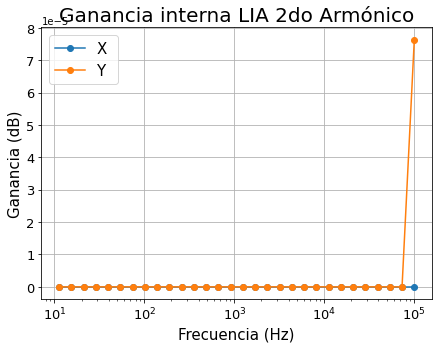

In [6]:


# abro el archivo
df = pd.read_csv(f"data/harm#2/20230628095234_int.txt", sep="\t")
V_in = 0.05

#ploteo
plot_figure('Ganancia interna LIA 2do Armónico','Frecuencia (Hz)','Ganancia (dB)','log')
plt.plot(df['# frequency (Hz)'],df['Voltage_X (V) ']/V_in,'-o', label='X ')
plt.plot(df['# frequency (Hz)'],np.abs(df['Voltage_Y (V)']/V_in),'-o', label='Y')
plt.legend(fontsize=15)



### Medición B

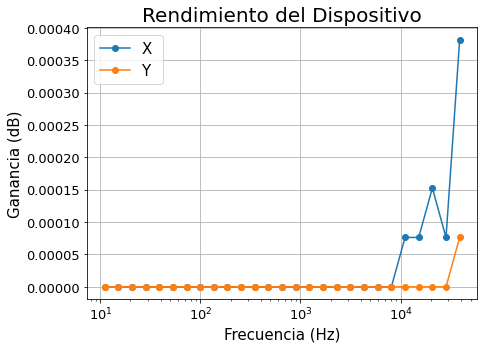

In [7]:


# abro el archivo
df = pd.read_csv(f"data/harm#2/20230628093600.txt", sep="\t")
V_in = 0.05

#ploteo
plot_figure('Rendimiento del Dispositivo','Frecuencia (Hz)','Ganancia (dB)','log')
plt.plot(df['# frequency (Hz)'],df['Voltage_X (V) ']/V_in,'-o', label='X ')
plt.plot(df['# frequency (Hz)'],np.abs(df['Voltage_Y (V)']/V_in),'-o', label='Y')
plt.legend(fontsize=15)


### Calculando la frecuencia en donde el amplificador no responde como se espera

Calculamos la media movil simple, si es mayor a la media movil cumulativa + el error (std), ya tomo como que sla respuetsa es mala

In [21]:
#SMA
df = pd.read_csv(f"data/harm#1/20230626130737.txt", sep="\t")
df['SMA_X_5'] = df['Voltage_X (V) '].rolling(5).mean()
df['SMA_Y_5'] = df['Voltage_Y (V)'].rolling(5).mean()

#cma
df['CMA_X_5'] = df['Voltage_X (V) '].expanding().mean()
df['CMA_Y_5'] = df['Voltage_Y (V)'].expanding().mean()

#std
#cma
df['STD_X_5'] = df['Voltage_X (V) '].expanding().std()
df['STD_Y_5'] = df['Voltage_Y (V)'].expanding().std()

# removing all the NULL values using
# dropna() method
df.dropna(inplace=True)
df.columns


Index(['# frequency (Hz)', 'Voltage_X (V) ', 'Voltage_Y (V)', 'SMA_X_5',
       'SMA_Y_5', 'CMA_X_5', 'CMA_Y_5', 'STD_X_5', 'STD_Y_5'],
      dtype='object')

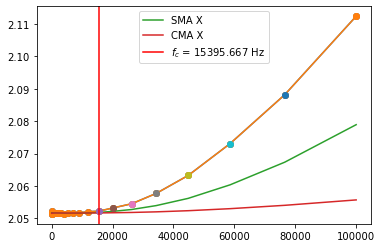

In [46]:

plt.figure()
plt.plot(df['# frequency (Hz)'],df[ 'Voltage_X (V) ']/V_in,'-o')
plt.plot(df['# frequency (Hz)'],df[ 'Voltage_X (V) ']/V_in,'-o')
plt.plot(df['# frequency (Hz)'],df['SMA_X_5']/V_in, label='SMA X ')
plt.plot(df['# frequency (Hz)'],df['CMA_X_5']/V_in, label='CMA X ')
fr = []
for row in df.iloc:
    std = row['STD_X_5']
    cma = row['CMA_X_5']
    sma = row['SMA_X_5']
    if cma+std/2 < sma: 
        fr.append(row['# frequency (Hz)'])
        #print(row[['# frequency (Hz)', 'Voltage_X (V) ']])
        plt.plot(row['# frequency (Hz)'],row[ 'Voltage_X (V) ']/V_in,'-o')
plt.axvline(fr[0],color='red',label=f'$f_c$ = {fr[0]} Hz')
plt.legend()

In [27]:
df_new = pd.DataFrame([],index=['# frequency (Hz)', 'Voltage_X (V) ', 'Voltage_Y (V)', 'SMA_X_5','SMA_Y_5', 'CMA_X_5', 'CMA_Y_5', 'STD_X_5', 'STD_Y_5'])
df_new

""
# frequency (Hz)
Voltage_X (V)
Voltage_Y (V)
SMA_X_5
SMA_Y_5
CMA_X_5
CMA_Y_5
STD_X_5
STD_Y_5


In [ ]:
#ploteo
plot_figure('Rendimiento del Dispositivo','Frecuencia (Hz)','Ganancia (dB)','log')
plt.plot(df['# frequency (Hz)'],df['Voltage_X (V) ']/V_in,'-o', label='X ')
plt.plot(df['# frequency (Hz)'],np.abs(df['Voltage_Y (V)']/V_in),'-o', label='Y')
plt.plot(df['# frequency (Hz)'],df['SMA_X_5']/V_in, label='SMA X ')
plt.plot(df['# frequency (Hz)'],np.abs(df['SMA_Y_5']/V_in), label='SMA Y')
plt.plot(df['# frequency (Hz)'],df['CMA_X_5']/V_in, label='CMA X ')
plt.plot(df['# frequency (Hz)'],np.abs(df['CMA_Y_5']/V_in), label='CMA Y')
plt.legend(fontsize=15)